## __Milan Hingu__


## __GRIP-The Sparks Foundation Internship__

### __Data Science & Business Analytics__

#### Task 2
#### Unsupervisied ML
#### Predict Optimum no. of clusters & represent it visually.

#### Importing All required libraries:-

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

#### Importing Data:-

In [2]:
Iris = pd.read_csv(r'C:\Users\hp\Documents\Spark Foundation Task\Iris.csv')
Iris 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### Overview of Data:-

In [3]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Getting Data Info:-

In [5]:
Iris.shape

(150, 6)

In [6]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Checking presention of Null values:-

In [7]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

    There are no Null Values

#### Descriptive Statistics:-

In [8]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Correlation Between Sepal Length(cm),Sepal Width(cm),Petal Length(cm) & Petal Width(cm):-

<AxesSubplot:>

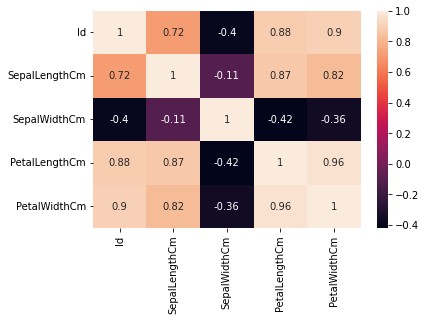

In [9]:
sns.heatmap(Iris.corr(),annot=True)

from the Heatmap,we can see that Sepal Lenght(cm) is Highly Positively Correlated with Petal Length(cm) & Petal Widht(cm).Sepal Lenght(cm) is Less Negative Correlation with Sepal Width(cm).

#### Preprocessing of Data:-

In [10]:
Iris.drop(['Id','Species'],axis=1,inplace=True)
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Determining the optimum number of clusters using Elbow method:-

In [12]:
x = Iris.iloc[:, [0,1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### K-Means clustering using elbow method:-

In [13]:
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=10,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

#### plotting line graph for above elbow method:-

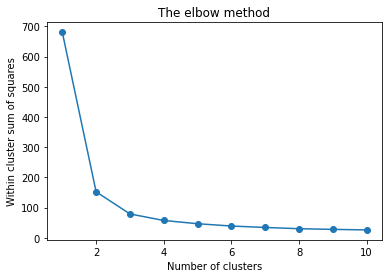

In [14]:
no_cluster=range(1,11)
plt.plot(no_cluster,wcss,"o-")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

#### creating the kmeans classifier:-

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [16]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Plotting the Clusters:-

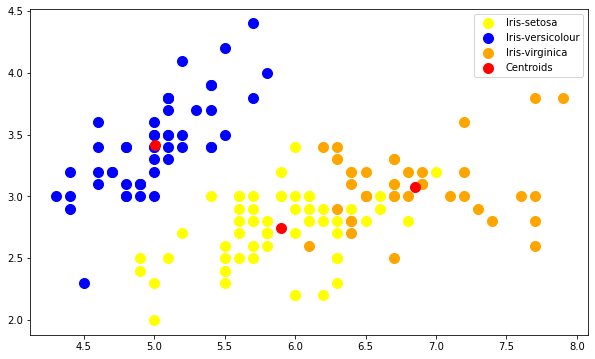

In [17]:
#visualization of clusters:-

plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Red', label = 'Centroids')

plt.legend()

#### 3D Scatter Plot

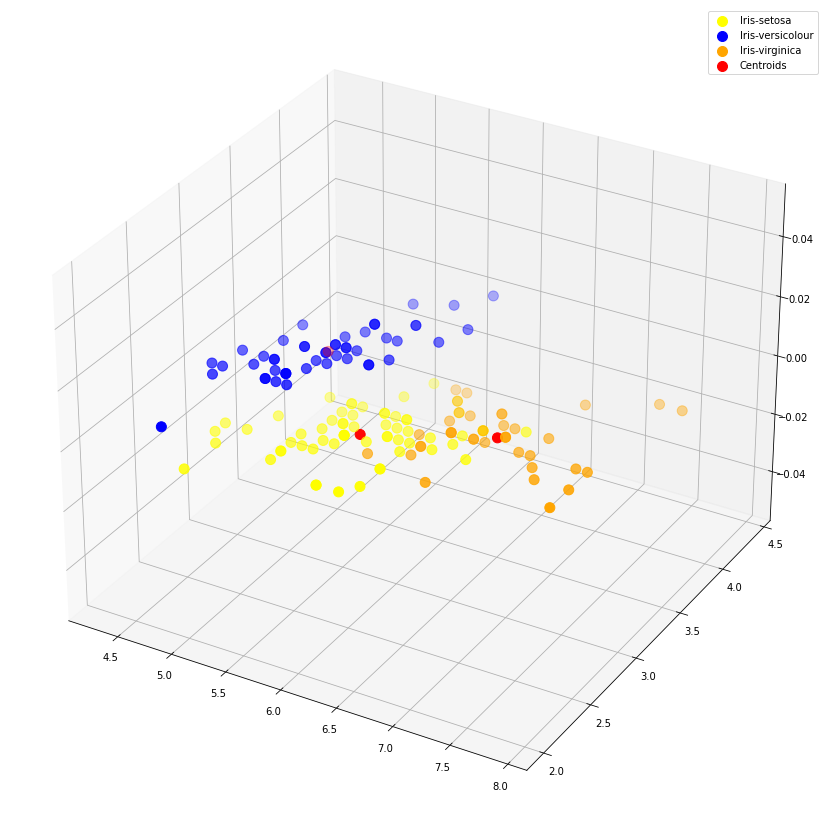

In [19]:
#visualization of clusters:-
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Red', label = 'Centroids')

plt.legend()

#### labelling the predictions:-

In [22]:
y_kmeans=np.where(y_kmeans=='0','Iris-Setosa',y_kmeans)
y_kmeans=np.where(y_kmeans=='1','Iris-Versicolour',y_kmeans)
y_kmeans=np.where(y_kmeans=='2','Iris-Virginica',y_kmeans)

#### Adding Prediction to dataset:-

In [36]:
data_with_clusters=Iris.copy()
data_with_clusters["Cluster"]=y_kmeans
print(data_with_clusters.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Cluster
0            5.1           3.5            1.4           0.2  Iris-Versicolour
1            4.9           3.0            1.4           0.2  Iris-Versicolour
2            4.7           3.2            1.3           0.2  Iris-Versicolour
3            4.6           3.1            1.5           0.2  Iris-Versicolour
4            5.0           3.6            1.4           0.2  Iris-Versicolour


#### Barplot-Cluster Distribution:-

<AxesSubplot:ylabel='Cluster'>

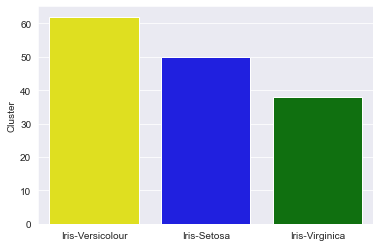

In [37]:
sns.set_style('darkgrid')
sns.barplot(x=data_with_clusters["Cluster"].unique()
            ,y=data_with_clusters["Cluster"].value_counts(),
            palette=sns.color_palette(["Yellow","Blue","Green"]))

There are around 62 Iris-Versicolour,50 Iris-Setosa and 38 Iris-Virginica in the Dataset as Predicted.

#### Viollin Plot

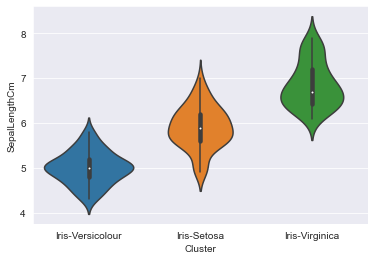

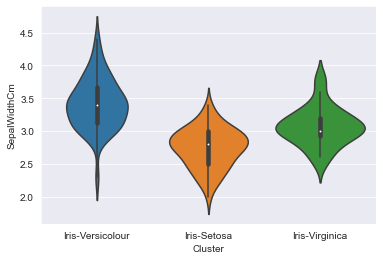

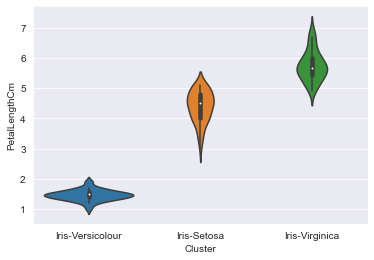

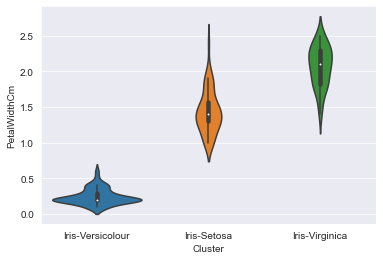

In [41]:
sns.violinplot(x="Cluster",y="SepalLengthCm",data=data_with_clusters)
plt.show()

sns.violinplot(x="Cluster",y="SepalWidthCm",data=data_with_clusters)
plt.show()

sns.violinplot(x="Cluster",y="PetalLengthCm",data=data_with_clusters)
plt.show()

sns.violinplot(x="Cluster",y="PetalWidthCm",data=data_with_clusters)
plt.show()

#### Pair Plot

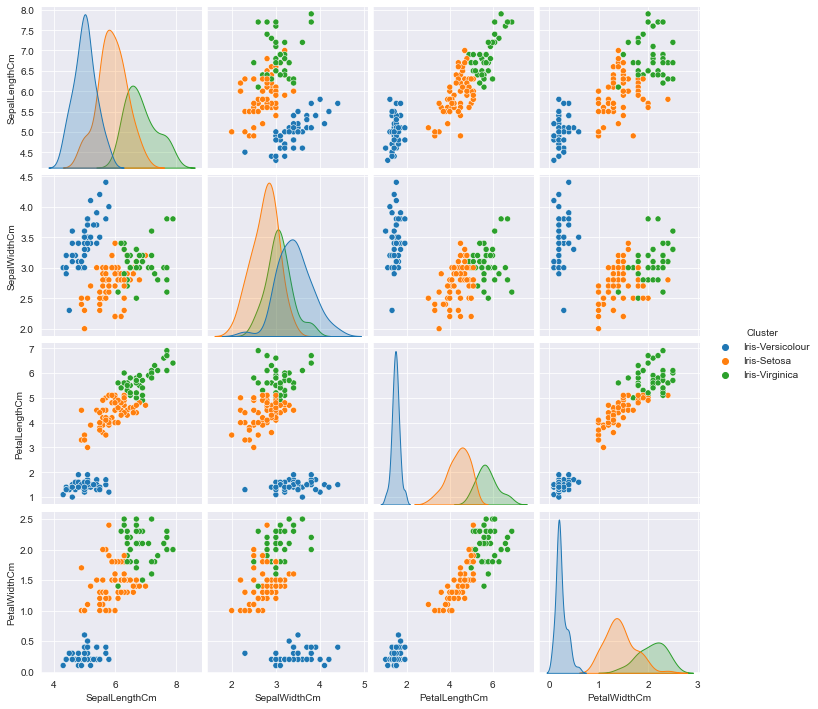

In [43]:
sns.set_style('darkgrid')
sns.pairplot(data_with_clusters,hue='Cluster');

## Thank You